# Keras Basic Syntax
TensorFlow 2.0 , Keras is now the main API choice. Let's work through a simple regression project to understand the basics of the Keras syntax and adding layers.

### Import library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Load the Data
Here use a very simple fake data set just for learning the basic syntax of Keras

In [3]:
df = pd.read_csv('DATA/fake_reg.csv')

In [4]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### Explore the data
We should see strong correlation between the features and the "price" of this made up product.

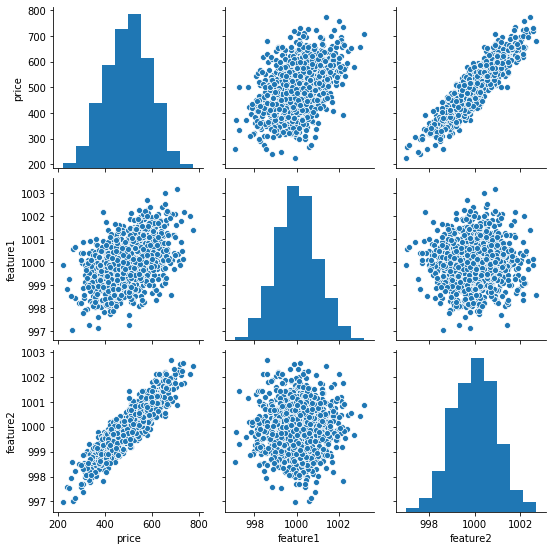

In [5]:
sns.pairplot(df)

### TrainTest split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#Convert Pandas to Numpy
#Features
X = df[['feature1','feature2']].values

#Label
y = df['price'].values

#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [8]:
print(X_train.shape)
print(X_test.shape)

(700, 2)
(300, 2)


In [9]:
print(y_train.shape)
print(y_test.shape)

(700,)
(300,)


### Normalizing/Scaling the Data
scale the feature data

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
#help(MinMaxScaler)

In [12]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

**Notice to prevent data leakage from the test set, here only fit our scaler to the training set**

In [14]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train
#X_train.max()
#X_train.min()
#X_train.shape

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

# TensorFlow 2.0 Syntax

In [16]:
import tensorflow as tf

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [18]:
#help(Sequential)

### Creating a Model

In [20]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training model

In [21]:
model.fit(X_train,y_train,epochs=250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 5s 7ms/sample - loss: 256644.9056
Epoch 2/250
700/700 [==============================] - 0s 80us/sample - loss: 256556.7836
Epoch 3/250
700/700 [==============================] - 0s 99us/sample - loss: 256466.9062
Epoch 4/250
700/700 [==============================] - 0s 109us/sample - loss: 256358.8188
Epoch 5/250
700/700 [==============================] - 0s 85us/sample - loss: 256237.2423
Epoch 6/250
700/700 [==============================] - 0s 73us/sample - loss: 256093.8458
Epoch 7/250
700/700 [==============================] - 0s 64us/sample - loss: 255931.6857
Epoch 8/250
700/700 [==============================] - 0s 87us/sample - loss: 255750.7719
Epoch 9/250
700/700 [==============================] - 0s 75us/sample - loss: 255550.5261
Epoch 10/250
700/700 [==============================] - 0s 86us/sample - loss: 255333.9595
Epoch 11/250
700/700 [==============================] - 0s 77us/sample - loss:

Epoch 91/250
700/700 [==============================] - 0s 86us/sample - loss: 44803.7650
Epoch 92/250
700/700 [==============================] - 0s 98us/sample - loss: 40502.4791
Epoch 93/250
700/700 [==============================] - 0s 93us/sample - loss: 36303.1543
Epoch 94/250
700/700 [==============================] - 0s 97us/sample - loss: 32322.3643
Epoch 95/250
700/700 [==============================] - 0s 91us/sample - loss: 28460.5863
Epoch 96/250
700/700 [==============================] - 0s 86us/sample - loss: 24751.3353
Epoch 97/250
700/700 [==============================] - 0s 82us/sample - loss: 21273.0983
Epoch 98/250
700/700 [==============================] - 0s 99us/sample - loss: 18026.7745
Epoch 99/250
700/700 [==============================] - 0s 94us/sample - loss: 15011.5491
Epoch 100/250
700/700 [==============================] - 0s 89us/sample - loss: 12249.3532
Epoch 101/250
700/700 [==============================] - 0s 85us/sample - loss: 9784.3433
Epoch 102

700/700 [==============================] - 0s 58us/sample - loss: 341.6551
Epoch 183/250
700/700 [==============================] - 0s 85us/sample - loss: 329.8245
Epoch 184/250
700/700 [==============================] - 0s 77us/sample - loss: 318.2498
Epoch 185/250
700/700 [==============================] - 0s 93us/sample - loss: 308.9643
Epoch 186/250
700/700 [==============================] - 0s 82us/sample - loss: 297.7087
Epoch 187/250
700/700 [==============================] - 0s 70us/sample - loss: 286.1957
Epoch 188/250
700/700 [==============================] - 0s 72us/sample - loss: 275.6909
Epoch 189/250
700/700 [==============================] - 0s 88us/sample - loss: 266.4132
Epoch 190/250
700/700 [==============================] - 0s 96us/sample - loss: 255.8569
Epoch 191/250
700/700 [==============================] - 0s 101us/sample - loss: 244.7829
Epoch 192/250
700/700 [==============================] - 0s 89us/sample - loss: 236.2097
Epoch 193/250
700/700 [===========

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              multiple                  12        
_________________________________________________________________
dense_5 (Dense)              multiple                  20        
_________________________________________________________________
dense_6 (Dense)              multiple                  20        
_________________________________________________________________
dense_7 (Dense)              multiple                  5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [23]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss
0,256644.905625
1,256556.783571
2,256466.906250
3,256358.818750
4,256237.242321


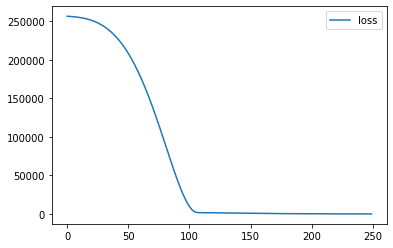

In [24]:
model_loss.plot()

In [25]:
print('Max: ',model_loss.max())
print('Min: ',model_loss.min())

Max:  loss    256644.905625
dtype: float64
Min:  loss    24.485394
dtype: float64


# Model Evaluation
Compare final evaluation (MSE) on training set and test set.

In [26]:
model.metrics_names

['loss']

In [27]:
training_score = model.evaluate(x=X_train, y=y_train, verbose=0)
test_score = model.evaluate(x=X_test, y=y_test, verbose=0)

In [28]:
print(training_score)
print(test_score)

24.092059565952844
25.33021469116211


### Further Evaluations

In [29]:
test_predictions = model.predict(X_test)

In [30]:
test_predictions[:2]

array([[405.87964],
       [623.144  ]], dtype=float32)

In [31]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [33]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [34]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [35]:
test_predictions

0      405.879639
1      623.143982
2      591.747314
3      572.360535
4      367.951782
          ...    
295    529.330688
296    516.356018
297    609.254028
298    417.224091
299    411.659027
Length: 300, dtype: float32

In [36]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [37]:
pred_df.columns = ['Test Y','Model Predictions']

In [38]:
pred_df

,Test Y,Model Predictions
0,402.296319,405.879639
1,624.156198,623.143982
2,582.455066,591.747314
3,578.588606,572.360535
4,371.224104,367.951782
...,...,...
295,525.704657,529.330688
296,502.909473,516.356018
297,612.727910,609.254028
298,417.569725,417.224091


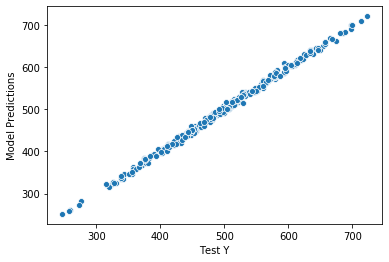

In [39]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [40]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

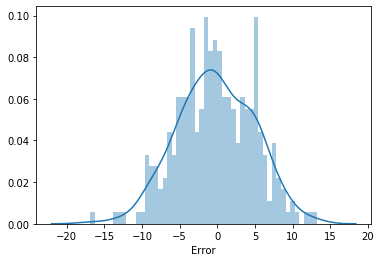

In [41]:
sns.distplot(pred_df['Error'],bins=50)

In [42]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [43]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.061707171958982

In [44]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

25.330218908649

In [45]:
# Essentially the same thing, difference just due to precision
test_score

25.33021469116211

In [46]:
#RMSE
test_score**0.5

5.032913141627035

# Predicting on brand new data

In [47]:
# [[Feature1, Feature2]]
new_data = [[998,1000]]

In [48]:
# Don't forget to scale!
scaler.transform(new_data)

array([[0.14117652, 0.53968792]])

In [49]:
new_data = scaler.transform(new_data)

In [50]:
model.predict(new_data)

array([[420.74194]], dtype=float32)

# Saving and Loading a Model

In [51]:
from tensorflow.keras.models import load_model

In [52]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [53]:
later_model = load_model('my_model.h5')

In [54]:
later_model.predict(new_data)

array([[420.74194]], dtype=float32)